In [1]:
import numpy as np

In [2]:
import scipy.stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import b2plot as bp
plt.style.use("belle2")

For optimal usage set `plt.style.use('belle2')`


In [5]:
delta=1e-2
span = np.arange(0,60,delta)

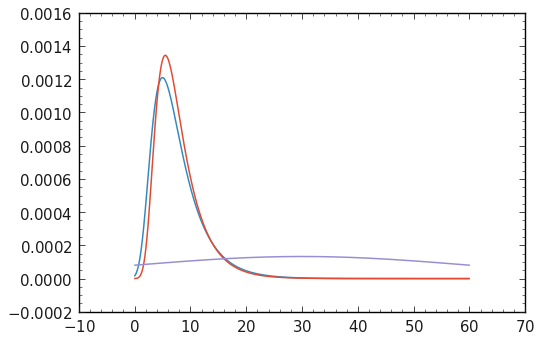

In [6]:
background =scipy.stats.norm(30,30).pdf(span)*delta

values = scipy.stats.moyal(5,2).pdf(span)*delta
values2 = scipy.stats.moyal(5.5,1.8).pdf(span)*delta


plt.plot(span, values)
plt.plot(span, values2)
plt.plot(span, background)

In [7]:
prob1 = 0.06
prob2 = 0.03
strength1 = 500
strength2= 2000
smearer1 = scipy.stats.moyal(loc=0.00001,scale=0.0001*strength1)
smearer2 = scipy.stats.moyal(loc=0.00001,scale=0.0001*strength2)

In [8]:

post_measured = []
for n,value in enumerate(span):
#     print(n)
    value_new = value
    for interaction_possibility in range(0,10):
        if np.random.random()>prob1:
            value_new+=smearer1.rvs(1)
        if np.random.random()>prob2:
            value_new+=smearer2.rvs(1)
    post_measured.append(value_new)
post_measured = np.array(post_measured).flatten()

In [9]:

independent_measurement = []
for n,value in enumerate(span):
#     print(n)
    value_new = value
    for interaction_possibility in range(0,10):
        if np.random.random()>prob1:
            value_new+=smearer1.rvs(1)
        if np.random.random()>prob2:
            value_new+=smearer2.rvs(1)
    independent_measurement.append(value_new)
independent_measurement = np.array(independent_measurement).flatten()

(0.0, 59.99)

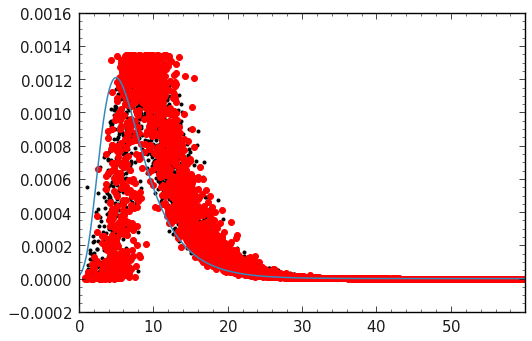

In [10]:
plt.plot(post_measured, values,"k.")
plt.plot(independent_measurement, values2,"ro")
plt.plot(span, values)
plt.xlim(span[0],span[-1])

In [11]:
def do_measurement(span1,span2, size, distribution):
    idx = np.random.choice(np.arange(len(span)), size=size, p=distribution/np.sum(distribution))
    return span1[idx], span2[idx]

In [12]:
pre_spreading,post_spreading = do_measurement(span,post_measured, 100000, values,)
nature, measurement = do_measurement(span,independent_measurement, 1000, values2+background,)
_, background = do_measurement(span,independent_measurement, 1000, background,)

In [13]:
import b2plot as bp
plt.style.use("belle2")

(0.0, 59.99)

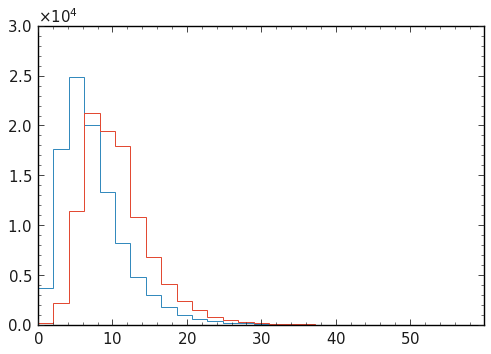

In [14]:
_ = bp.hist(pre_spreading, bins=np.linspace(span[0],span[-1],30))
_ = bp.hist(post_spreading, bins=np.linspace(span[0],span[-1],30))
plt.xlim(span[0],span[-1])

In [21]:
unfolding_bins=30
unfolding_range=10,35
bins = [-10]+list(np.linspace(*unfolding_range,unfolding_bins))+[60]
bins=np.array(bins)

(10.0, 35.0)

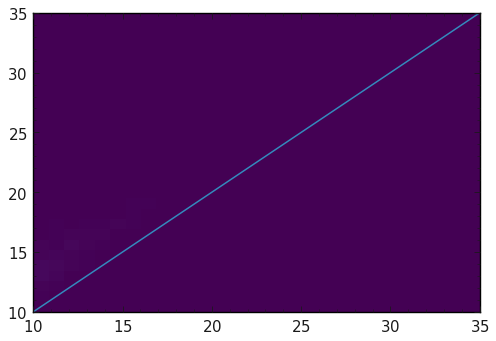

In [22]:
_ = plt.hist2d(pre_spreading, post_spreading, bins=[bins,bins])
plt.plot(np.linspace(*unfolding_range,unfolding_bins),np.linspace(*unfolding_range,unfolding_bins))
plt.xlim(*unfolding_range)
plt.ylim(*unfolding_range)

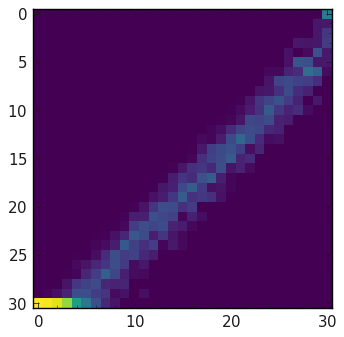

In [23]:
n_matrix, _, _ = np.histogram2d(x=pre_spreading, y=post_spreading, 
                                bins=[bins,bins])
x = np.linalg.norm(n_matrix, ord=1, axis=0)
mig_matrix = n_matrix/np.expand_dims(x, axis=0)
plt.imshow(mig_matrix[::-1])

(-20.0, 20.0)

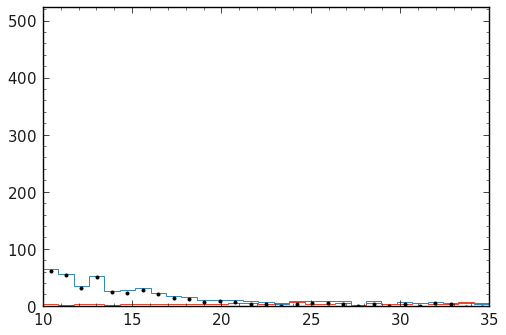

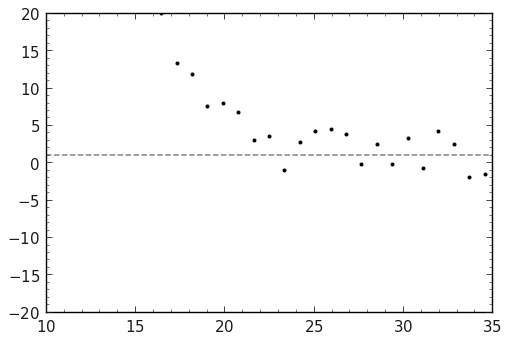

In [24]:
n,_,_ = bp.hist(measurement, bins=bins)
nbkg,_,_ = bp.hist(background, bins=bins, scale=0.25)

n = n - nbkg
plt.plot(bp.bc(bins), n,"k.")
plt.xlim(*unfolding_range)
plt.ylim(0,np.max(n)*1.61)

fig,ax = plt.subplots()
plt.axhline(1, ls="dashed", color="grey")
ax.plot(bp.bc(bins), n, "k.")
ax.set_ylim(0.0,2)
ax.set_xlim(*unfolding_range)

plt.ylim(-20,20)

In [25]:
unfolded = mig_matrix.dot(n)

(10.0, 35.0)

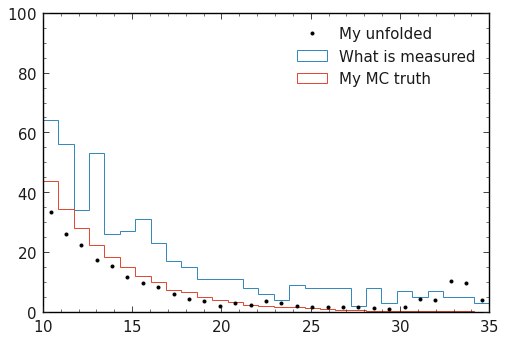

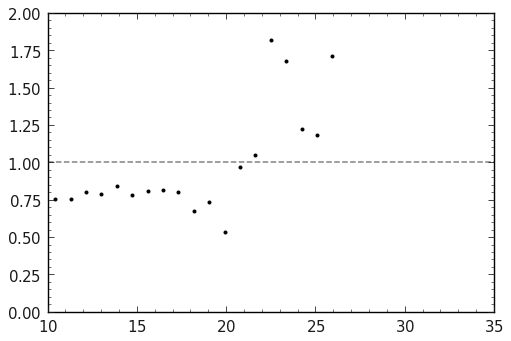

In [28]:
test1,_,_ = bp.hist(measurement, bins=bins, label="What is measured")
# test2,_,_ = bp.hist(nature, bins=bins, label="nature")

test,_,_ = bp.hist(pre_spreading, bins=bins, scale=1/100, label="My MC truth")
# _ = bp.hist(post_spreading, bins=np.linspace(*unfolding_range, unfolding_bins), scale=1/10)

plt.plot(bp.bc(bins), unfolded, "k.", label="My unfolded")
plt.xlim(*unfolding_range)
plt.legend(loc="best")
plt.ylim(0,100)

fig,ax = plt.subplots()
plt.axhline(1, ls="dashed", color="grey")
ax.plot(bp.bc(bins), unfolded/test, "k.")
ax.set_ylim(0.0,2)
ax.set_xlim(*unfolding_range)


#np.sum(test)